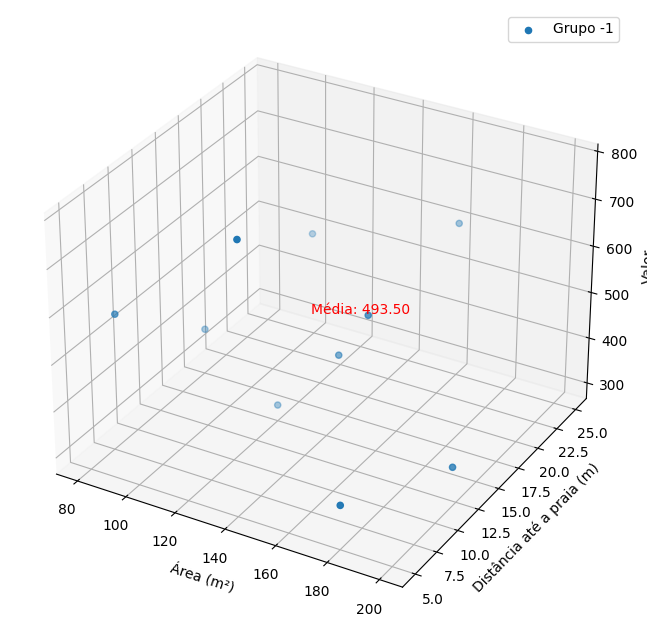

In [1]:
import numpy as np
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Criar arrays com os dados
area = np.array([120, 145, 80, 160, 200, 90, 110, 130, 180, 160])
valor = np.array([300, 450, 550, 600, 350, 420, 550, 780, 360, 575])
dist_praia = np.array([15, 15, 8, 25, 12, 15, 22, 8, 5, 14])

# Criar matriz de features
X = np.column_stack((area, dist_praia, valor))

# Aplicar o algoritmo DBSCAN
dbscan = DBSCAN(eps=10, min_samples=2)
labels = dbscan.fit_predict(X)

# Calcular valor médio em cada grupo
valores_grupos = {}
for label in set(labels):
    indices_grupo = np.where(labels == label)
    valores_grupo = valor[indices_grupo]
    valores_grupos[label] = np.mean(valores_grupo)

# Criar gráfico 3D de boxplot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

for label, mean_value in valores_grupos.items():
    indices_grupo = np.where(labels == label)
    ax.scatter(area[indices_grupo], dist_praia[indices_grupo], valor[indices_grupo], label=f'Grupo {label}')
    ax.text(np.mean(area[indices_grupo]), np.mean(dist_praia[indices_grupo]), mean_value + 50,
            f'Média: {mean_value:.2f}', color='red')

ax.set_xlabel('Área (m²)')
ax.set_ylabel('Distância até a praia (m)')
ax.set_zlabel('Valor')
ax.legend()
plt.show()